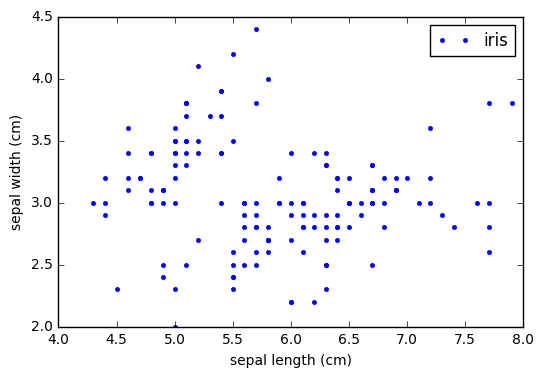

In [61]:

# data
from sklearn.datasets import load_iris
db = load_iris()
dat = db.data

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dat[::,0], dat[::,1], 'b.', label="iris", linewidth=1)
plt.xlabel(db.feature_names[0])
plt.ylabel(db.feature_names[1])
plt.legend()





In [78]:
import scipy
import scipy.cluster.vq
import scipy.spatial.distance
import numpy as np
EuclDist = scipy.spatial.distance.euclidean
def gapStat(data, resf=None, nrefs=10, ks=range(1,10)):
    '''
    Gap statistics
    '''
    # MC
    shape = data.shape
    if resf == None:
        x_max = data.max(axis=0)
        x_min = data.min(axis=0)
        dists = np.matrix(np.diag(x_max-x_min))
        rands = np.random.random_sample(size=(shape[0], shape[1], nrefs))
        for i in xrange(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+x_min
    else:
        rands = refs
    gaps = np.zeros((len(ks),))
    gapDiff = np.zeros(len(ks)-1,)
    sdk = np.zeros(len(ks),)
    for (i,k) in enumerate(ks):
        (cluster_mean, cluster_res) = scipy.cluster.vq.kmeans2(data, k)
        Wk = sum([EuclDist(data[m,:], cluster_mean[cluster_res[m],:]) for m in xrange(shape[0])])
        WkRef = np.zeros((rands.shape[2],))
        for j in xrange(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            WkRef[j] = sum([EuclDist(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = scipy.log(scipy.mean(WkRef))-scipy.log(Wk)
        sdk[i] = np.sqrt((1.0+nrefs)/nrefs)*np.std(scipy.log(WkRef))
        
        if i > 0:
            gapDiff[i-1] = gaps[i-1] - gaps[i] + sdk[i]
    return gaps, gapDiff

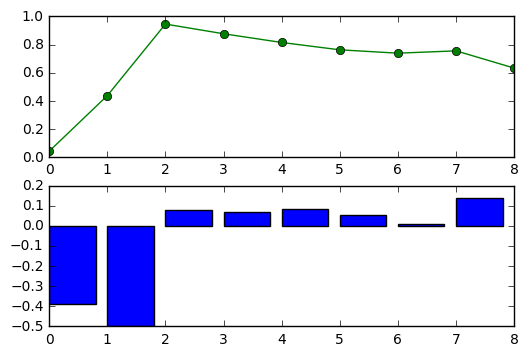

In [160]:
import numpy
mean = (1, 2)
cov = [[1, 0], [0, 1]]
#np.random.multivariate_normal(1.1, [[0,1],[1,0]])
Nf = 1000;
dat1 = np.zeros((3000,2))
dat1[0:1000,:] = numpy.random.multivariate_normal(mean, cov, 1000)
mean = [5, 6]
dat1[1000:2000,:] = numpy.random.multivariate_normal(mean, cov, 1000)
mean = [3, -7]
dat1[2000:3000,:] = numpy.random.multivariate_normal(mean, cov, 1000)




gaps,gapsDiff = gapStat(dat1)
%matplotlib inline
f, (a1,a2) = plt.subplots(2,1)
a1.plot(gaps, 'g-o')
a2.bar(np.arange(len(gapsDiff)),gapsDiff)
f.show()

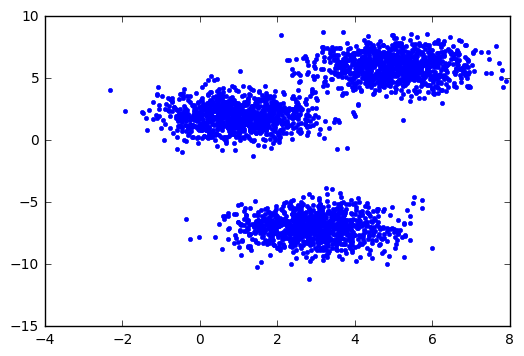

In [157]:
plt.plot(dat1[::,0], dat1[::,1], 'b.', linewidth=1)
plt.legend()

In [143]:

numpy.random.multivariate_normal(mean, cov, 4)


array([[ 1.75299943,  2.39432042],
       [ 0.8579837 ,  4.09627669],
       [ 1.6598904 ,  1.31568987],
       [ 0.20586608,  2.8764267 ]])